In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# read dataset from a Google Drive File

file_link = 'https://drive.google.com/file/d/1I_7FqtRxE3ihqaeQQRM9morridsi0Ar3/view' # the file access must have to be Public

# get the id part of the file
id = file_link.split("/")[-2]
# print(id)

# creating a new link using the id so that we can easily read the csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
print(new_link)
df = pd.read_csv(new_link)

# let's look at the first few instances
df.head()

https://drive.google.com/uc?id=1I_7FqtRxE3ihqaeQQRM9morridsi0Ar3


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.shape

(309, 16)

In [ ]:
#Total Features:
print(f"There are {df.shape[1]} features in this dataset.")

#Total Rows:
print(f"There are {df.shape[0]} rows in this dataset.")

#Data Points:
print(f"There are {df.size} data points in this dataset.")

# Classification or Regression?
print("This is a binary classification problem.")

There are 16 features in this dataset.
There are 309 rows in this dataset.
There are 4944 data points in this dataset.
This is a binary classification problem.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df.describe(include='all')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
freq,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270
mean,NaN,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,NaN
std,NaN,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,NaN
min,NaN,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,NaN
75%,NaN,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN


In [ ]:
# Check Unique Values
df.nunique()

,0
GENDER,2
AGE,39
SMOKING,2
YELLOW_FINGERS,2
ANXIETY,2
PEER_PRESSURE,2
CHRONIC DISEASE,2
FATIGUE,2
ALLERGY,2
WHEEZING,2


In [ ]:
# Check for missing values
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
#check the cat and num column name
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['GENDER', 'LUNG_CANCER']
Numerical Variables:
['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']


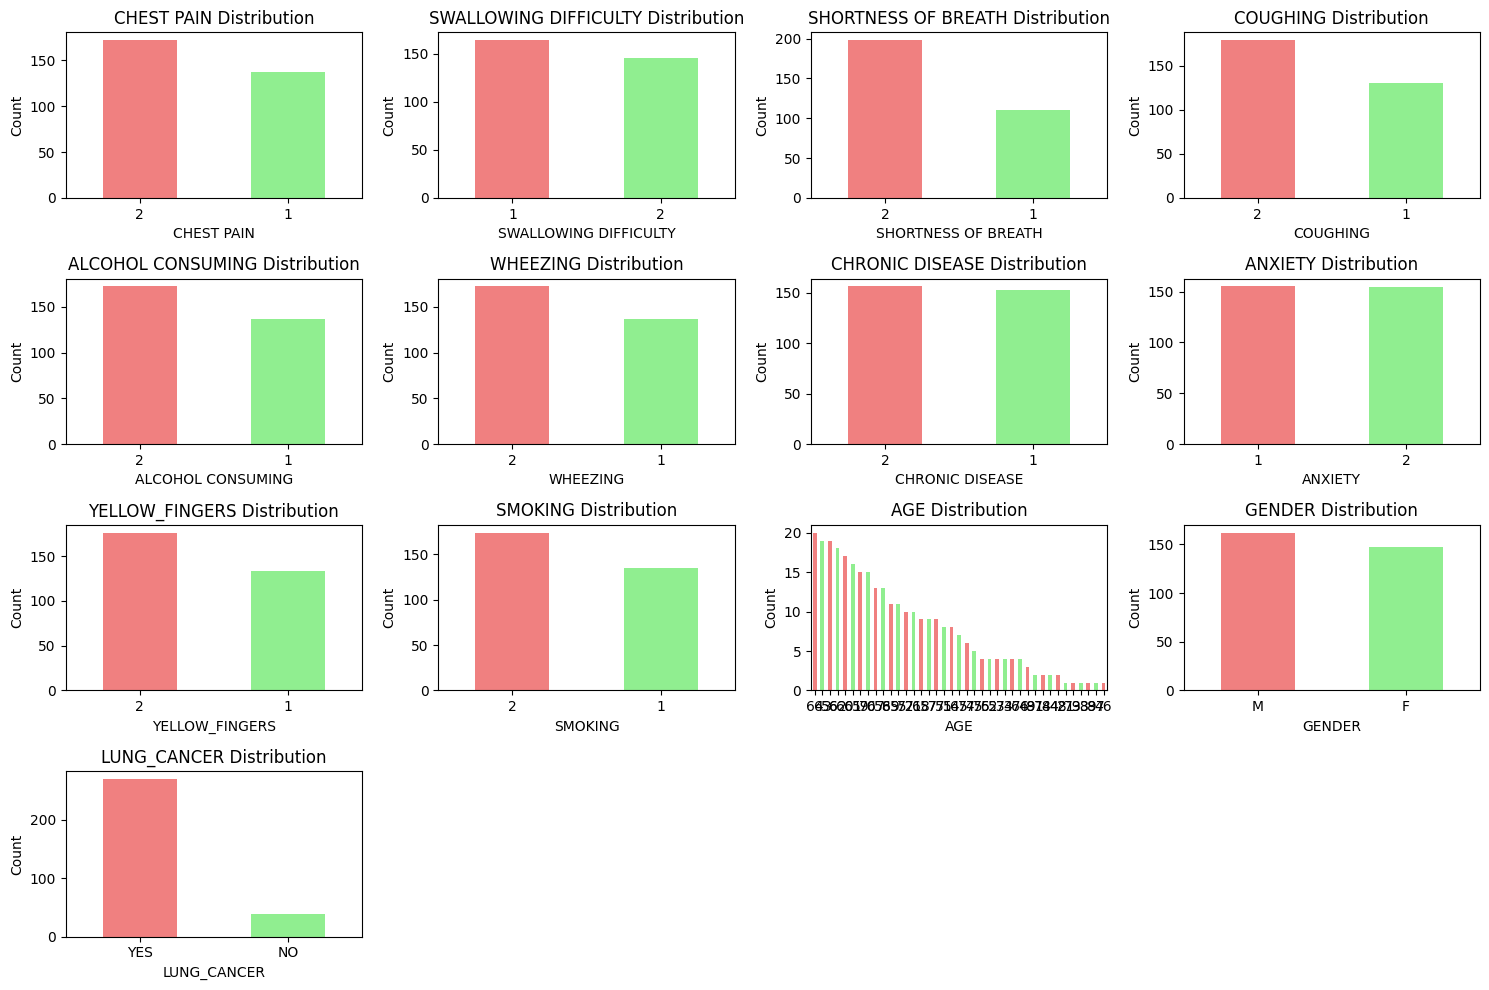

In [ ]:


# Assuming df is your DataFrame
plt.figure(figsize=(15, 10))

# 1
plt.subplot(4, 4, 1)
df['CHEST PAIN'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('CHEST PAIN Distribution')
plt.xlabel('CHEST PAIN')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 2
plt.subplot(4, 4, 2)
df['SWALLOWING DIFFICULTY'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('SWALLOWING DIFFICULTY Distribution')
plt.xlabel('SWALLOWING DIFFICULTY')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 3
plt.subplot(4, 4, 3)
df['SHORTNESS OF BREATH'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('SHORTNESS OF BREATH Distribution')
plt.xlabel('SHORTNESS OF BREATH')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 4
plt.subplot(4, 4, 4)
df['COUGHING'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('COUGHING Distribution')
plt.xlabel('COUGHING')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 5
plt.subplot(4, 4, 5)
df['ALCOHOL CONSUMING'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('ALCOHOL CONSUMING Distribution')
plt.xlabel('ALCOHOL CONSUMING')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 6
plt.subplot(4, 4, 6)
df['WHEEZING'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('WHEEZING Distribution')
plt.xlabel('WHEEZING')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 7
plt.subplot(4, 4, 7)
df['CHRONIC DISEASE'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('CHRONIC DISEASE Distribution')
plt.xlabel('CHRONIC DISEASE')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 8:
plt.subplot(4, 4, 8)
df['ANXIETY'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('ANXIETY Distribution')
plt.xlabel('ANXIETY')
plt.ylabel('Count')
plt.xticks(rotation=0)

#9
plt.subplot(4, 4, 9)
df['YELLOW_FINGERS'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('YELLOW_FINGERS Distribution')
plt.xlabel('YELLOW_FINGERS')
plt.ylabel('Count')
plt.xticks(rotation=0)
#10
plt.subplot(4, 4, 10)
df['SMOKING'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('SMOKING Distribution')
plt.xlabel('SMOKING')
plt.ylabel('Count')
plt.xticks(rotation=0)
#11
plt.subplot(4, 4, 11)
df['AGE'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('AGE Distribution')
plt.xlabel('AGE')
plt.ylabel('Count')
plt.xticks(rotation=0)
#12
plt.subplot(4, 4, 12)
df['GENDER'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('GENDER Distribution')
plt.xlabel('GENDER')
plt.ylabel('Count')
plt.xticks(rotation=0)
#13
plt.subplot(4, 4, 13)
df['LUNG_CANCER'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('LUNG_CANCER Distribution')
plt.xlabel('LUNG_CANCER')
plt.ylabel('Count')
plt.xticks(rotation=0)



# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


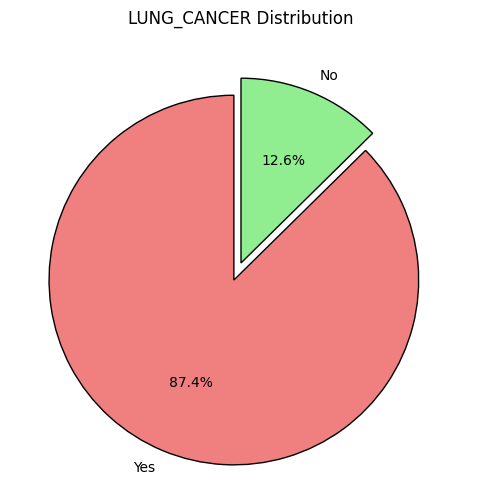

In [ ]:
plt.figure(figsize=(6, 6))  # Set the figure size
df['LUNG_CANCER'].value_counts().plot(
    kind='pie',
    colors=['lightcoral', 'lightgreen'],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.1, 0),  # Slightly separate the first slice for emphasis
    labels=['Yes', 'No'],  # Add labels if 'Yes' and 'No' are the categories
    wedgeprops={'edgecolor': 'black'}  # Add a black border to slices
)
plt.title('LUNG_CANCER Distribution')
plt.ylabel('')  # Remove y-axis label for a cleaner look
plt.show()

In [ ]:
print(df.value_counts('GENDER'))
print(df.value_counts('AGE'))
print(df.value_counts('SMOKING'))
print(df.value_counts('YELLOW_FINGERS'))
print(df.value_counts('ANXIETY'))
print(df.value_counts('PEER_PRESSURE'))
print(df.value_counts('CHRONIC DISEASE'))
print(df.value_counts('WHEEZING'))
print(df.value_counts('ALCOHOL CONSUMING'))
print(df.value_counts('COUGHING'))
print(df.value_counts('SHORTNESS OF BREATH'))
print(df.value_counts('SWALLOWING DIFFICULTY'))
print(df.value_counts('CHEST PAIN'))
print(df.value_counts('LUNG_CANCER'))

GENDER
M    162
F    147
Name: count, dtype: int64
AGE
64    20
56    19
63    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
71    10
72    10
57     9
77     9
68     9
54     8
51     8
65     7
74     6
75     5
73     4
47     4
76     4
66     4
53     4
52     4
49     3
81     2
44     2
48     2
78     2
79     1
21     1
38     1
46     1
39     1
87     1
Name: count, dtype: int64
SMOKING
2    174
1    135
Name: count, dtype: int64
YELLOW_FINGERS
2    176
1    133
Name: count, dtype: int64
ANXIETY
1    155
2    154
Name: count, dtype: int64
PEER_PRESSURE
2    155
1    154
Name: count, dtype: int64
CHRONIC DISEASE
2    156
1    153
Name: count, dtype: int64
WHEEZING
2    172
1    137
Name: count, dtype: int64
ALCOHOL CONSUMING
2    172
1    137
Name: count, dtype: int64
COUGHING
2    179
1    130
Name: count, dtype: int64
SHORTNESS OF BREATH
2    198
1    111
Name: count, dtype: int64
SWALLOWING DIFFICULTY
1    164
2    145
Name: count, dt

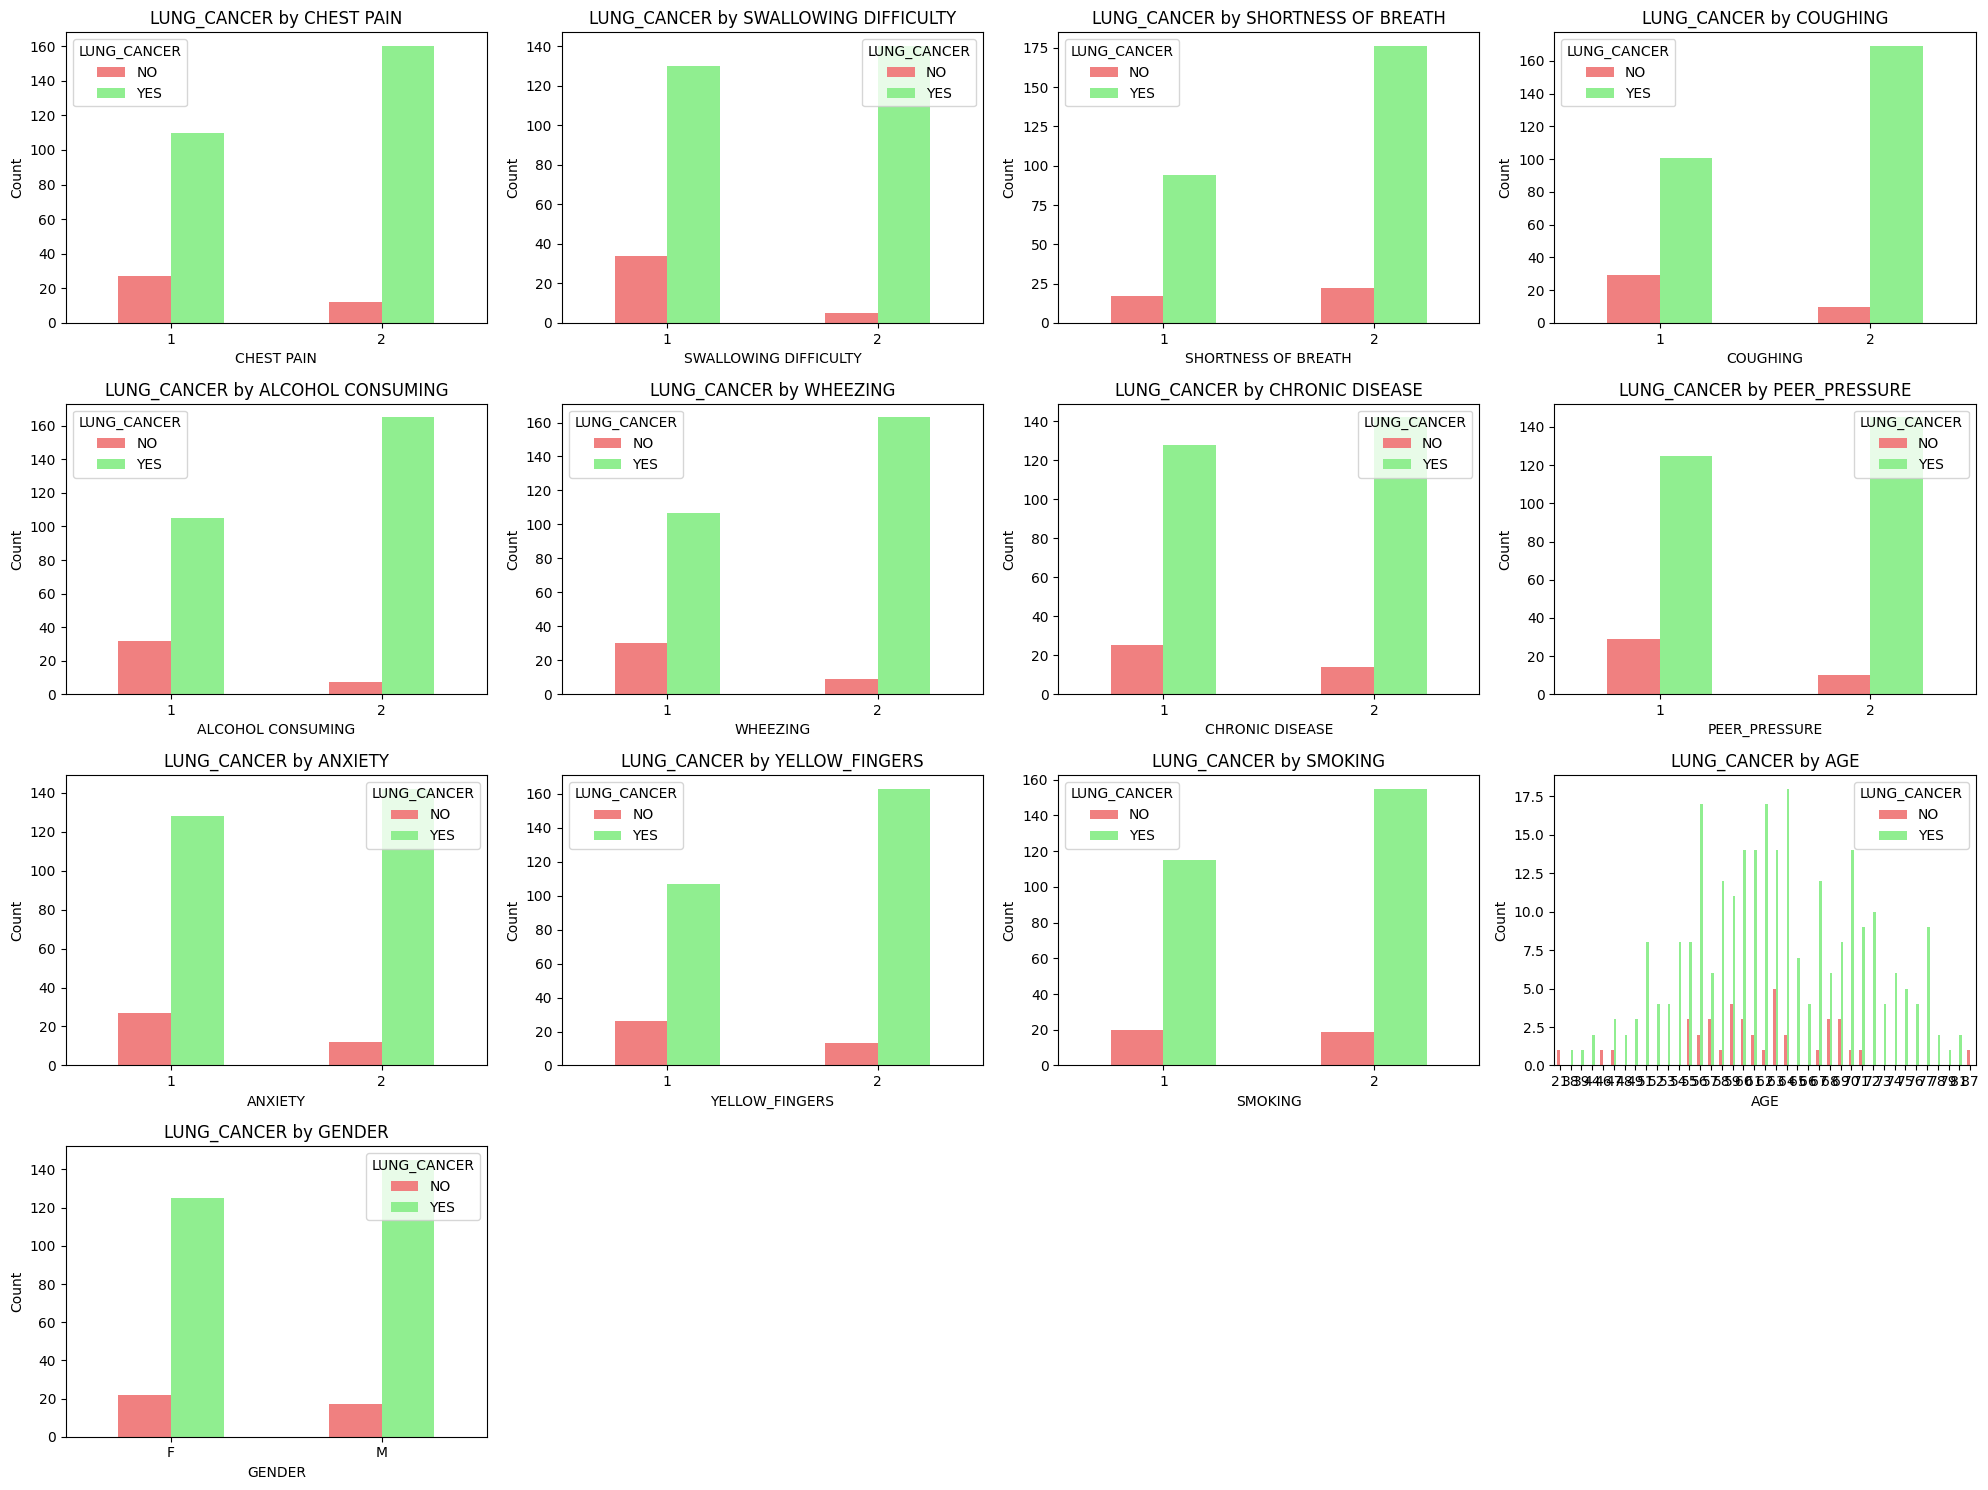

In [ ]:


# Create a figure with a large size to accommodate all subplots
plt.figure(figsize=(20, 15))

# 1
plt.subplot(4, 4, 1)  # 4 rows, 4 columns, position 1
pd.crosstab(df['CHEST PAIN'], df['LUNG_CANCER']).plot(kind='bar', color=['lightcoral', 'lightgreen'], ax=plt.gca())
plt.title('LUNG_CANCER by CHEST PAIN')
plt.xlabel('CHEST PAIN')
plt.ylabel('Count')
plt.xticks(rotation=0)

#2
plt.subplot(4, 4, 2)
pd.crosstab(df['SWALLOWING DIFFICULTY'], df['LUNG_CANCER']).plot(kind='bar', color=['lightcoral', 'lightgreen'], ax=plt.gca())
plt.title('LUNG_CANCER by SWALLOWING DIFFICULTY')
plt.xlabel('SWALLOWING DIFFICULTY')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 3
plt.subplot(4, 4, 3)
pd.crosstab(df['SHORTNESS OF BREATH'], df['LUNG_CANCER']).plot(kind='bar', color=['lightcoral', 'lightgreen'], ax=plt.gca())
plt.title('LUNG_CANCER by SHORTNESS OF BREATH')
plt.xlabel('SHORTNESS OF BREATH')
plt.ylabel('Count')
plt.xticks(rotation=0)

#4
plt.subplot(4, 4, 4)
pd.crosstab(df['COUGHING'], df['LUNG_CANCER']).plot(kind='bar', color=['lightcoral', 'lightgreen'], ax=plt.gca())
plt.title('LUNG_CANCER by COUGHING')
plt.xlabel('COUGHING')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 5
plt.subplot(4, 4, 5)
pd.crosstab(df['ALCOHOL CONSUMING'], df['LUNG_CANCER']).plot(kind='bar', color=['lightcoral', 'lightgreen'], ax=plt.gca())
plt.title('LUNG_CANCER by ALCOHOL CONSUMING')
plt.xlabel('ALCOHOL CONSUMING')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 6
plt.subplot(4, 4, 6)
pd.crosstab(df['WHEEZING'], df['LUNG_CANCER']).plot(kind='bar', color=['lightcoral', 'lightgreen'], ax=plt.gca())
plt.title('LUNG_CANCER by WHEEZING')
plt.xlabel('WHEEZING')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 7
plt.subplot(4, 4, 7)
pd.crosstab(df['CHRONIC DISEASE'], df['LUNG_CANCER']).plot(kind='bar', color=['lightcoral', 'lightgreen'], ax=plt.gca())
plt.title('LUNG_CANCER by CHRONIC DISEASE')
plt.xlabel('CHRONIC DISEASE')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 8
plt.subplot(4, 4, 8)
pd.crosstab(df['PEER_PRESSURE'], df['LUNG_CANCER']).plot(kind='bar', color=['lightcoral', 'lightgreen'], ax=plt.gca())
plt.title('LUNG_CANCER by PEER_PRESSURE')
plt.xlabel('PEER_PRESSURE')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 9
plt.subplot(4, 4, 9)
pd.crosstab(df['ANXIETY'], df['LUNG_CANCER']).plot(kind='bar', color=['lightcoral', 'lightgreen'], ax=plt.gca())
plt.title('LUNG_CANCER by ANXIETY')
plt.xlabel('ANXIETY')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 10
plt.subplot(4, 4, 10)
pd.crosstab(df['YELLOW_FINGERS'], df['LUNG_CANCER']).plot(kind='bar', color=['lightcoral', 'lightgreen'], ax=plt.gca())
plt.title('LUNG_CANCER by YELLOW_FINGERS')
plt.xlabel('YELLOW_FINGERS')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 11
plt.subplot(4, 4, 11)
pd.crosstab(df['SMOKING'], df['LUNG_CANCER']).plot(kind='bar', color=['lightcoral', 'lightgreen'], ax=plt.gca())
plt.title('LUNG_CANCER by SMOKING')
plt.xlabel('SMOKING')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 12
plt.subplot(4, 4, 12)
pd.crosstab(df['AGE'], df['LUNG_CANCER']).plot(kind='bar', color=['lightcoral', 'lightgreen'], ax=plt.gca())
plt.title('LUNG_CANCER by AGE')
plt.xlabel('AGE')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 13
plt.subplot(4, 4, 13)
pd.crosstab(df['GENDER'], df['LUNG_CANCER']).plot(kind='bar', color=['lightcoral', 'lightgreen'], ax=plt.gca())
plt.title('LUNG_CANCER by GENDER')
plt.xlabel('GENDER')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


                            AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
AGE                    1.000000 -0.084475        0.005205  0.053170   
SMOKING               -0.084475  1.000000       -0.014585  0.160267   
YELLOW_FINGERS         0.005205 -0.014585        1.000000  0.565829   
ANXIETY                0.053170  0.160267        0.565829  1.000000   
PEER_PRESSURE          0.018685 -0.042822        0.323083  0.216841   
CHRONIC DISEASE       -0.012642 -0.141522        0.041122 -0.009678   
FATIGUE                0.012614 -0.029575       -0.118058 -0.188538   
ALLERGY                0.027990  0.001913       -0.144300 -0.165750   
WHEEZING               0.055011 -0.129426       -0.078515 -0.191807   
ALCOHOL CONSUMING      0.058985 -0.050623       -0.289025 -0.165750   
COUGHING               0.169950 -0.129471       -0.012640 -0.225644   
SHORTNESS OF BREATH   -0.017513  0.061264       -0.105944 -0.144077   
SWALLOWING DIFFICULTY -0.001270  0.030718        0.345904  0.489403   
CHEST 

<Figure size 800x600 with 0 Axes>

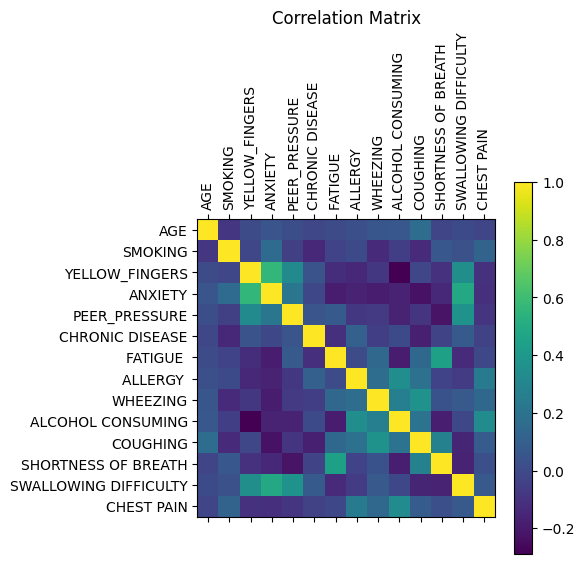

In [ ]:
# Correlation matrix plot
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

# Data Preprocessing

In [ ]:
df.loc[::3, 'AGE'] = np.nan# adding null values

In [ ]:
df = df.drop_duplicates()
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,NaN,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74.0,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59.0,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,NaN,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63.0,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,M,64.0,1,2,2,2,1,1,2,1,2,1,1,2,2,YES
303,M,NaN,1,2,1,1,2,2,2,2,2,2,2,1,2,YES
304,F,56.0,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
306,M,NaN,2,1,1,1,1,1,2,2,2,2,1,1,2,YES


In [ ]:
# Handle missing values in the column "Soil_Moisture_" by replacing with the mean value
df['AGE'].fillna(df['AGE'].mean(), inplace=True) #changing df permanently
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,62.618557,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74.000000,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59.000000,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,62.618557,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63.000000,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,M,64.000000,1,2,2,2,1,1,2,1,2,1,1,2,2,YES
303,M,62.618557,1,2,1,1,2,2,2,2,2,2,2,1,2,YES
304,F,56.000000,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
306,M,62.618557,2,1,1,1,1,1,2,2,2,2,1,1,2,YES


In [ ]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
df.shape

(281, 16)

In [ ]:
# Convert categorical variables to numerical (one-hot encoding)
df = pd.get_dummies(df, columns=['GENDER'])
df

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M
0,62.618557,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,False,True
1,74.000000,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,False,True
2,59.000000,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,True,False
3,62.618557,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,False,True
4,63.000000,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,64.000000,1,2,2,2,1,1,2,1,2,1,1,2,2,YES,False,True
303,62.618557,1,2,1,1,2,2,2,2,2,2,2,1,2,YES,False,True
304,56.000000,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,True,False
306,62.618557,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,False,True


In [ ]:
# Create a temporary variable for clarity
lung_cancer_col = df['LUNG_CANCER']

# Replace values
df['LUNG_CANCER'] = lung_cancer_col.replace({'YES': 1, 'NO': 0})

In [ ]:
df.shape

(281, 17)

# ***Decision tree $ Random Forest*** **

In [ ]:
# Split the data into 80-20 train-test split

X = df.drop(['LUNG_CANCER'], axis=1)#features
y = df['LUNG_CANCER']#target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

In [ ]:
# display the shapes

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (196, 16)
X_test shape: (85, 16)
y_train shape: (196,)
y_test shape: (85,)


Decision Tree Classifier Accuracy: 0.8117647058823529
F1 Score for Decision Tree Classifier: 0.8873239436619719


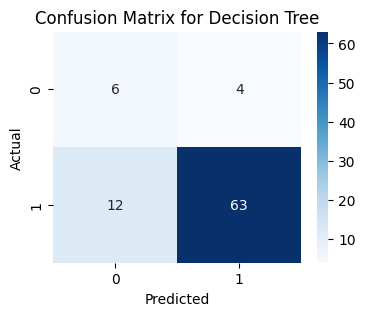

In [ ]:
# Implementing Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth = 10, random_state=1000)
decision_tree_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))
#accuracy = no.of correctly predicted data / total test data

# Calculate the F1 Score
f1 = f1_score(y_test, y_pred_dt, average='binary')

print("F1 Score for Decision Tree Classifier:", f1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest Classifier Accuracy: 0.9294117647058824
Confusion Matrix:
 [[ 7  3]
 [ 3 72]]
F1 Score: 0.96


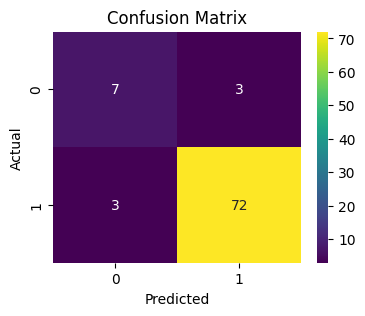

In [ ]:
#Random forest

X = df.drop(['LUNG_CANCER'], axis=1)  # Features
y = df['LUNG_CANCER']  # Target column

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

# Implementing Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=5, criterion='gini', bootstrap=True, random_state=1000)
random_forest_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
# Output results
print("Random Forest Classifier Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("F1 Score:", f1)

# Plotting the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **KNN**

KNN Classifier Accuracy: 0.8941176470588236
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.60      0.30      0.40        10
           1       0.91      0.97      0.94        75

    accuracy                           0.89        85
   macro avg       0.76      0.64      0.67        85
weighted avg       0.88      0.89      0.88        85

F1 Score: 0.9419354838709677


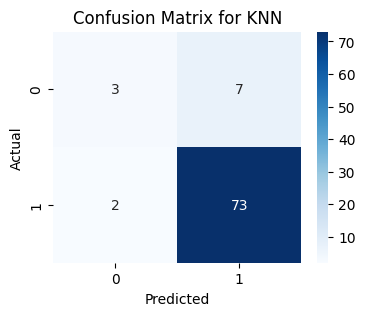

In [ ]:
# Implementing KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors
knn_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_knn = knn_model.predict(X_test)
f1 = f1_score(y_test, y_pred_knn)
# Evaluate the model
print("KNN Classifier Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))
print("F1 Score:", f1)
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **SVM**

SVM Accuracy: 0.9647058823529412
Confusion Matrix for SVM:
 [[10  0]
 [ 3 72]]
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.96      0.98        75

    accuracy                           0.96        85
   macro avg       0.88      0.98      0.92        85
weighted avg       0.97      0.96      0.97        85

F1 Score: 0.9795918367346939


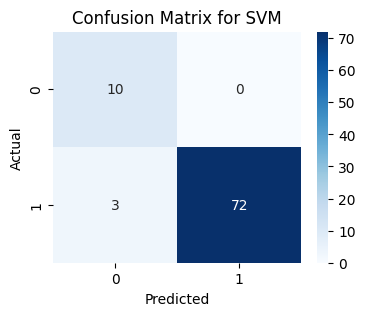

In [ ]:
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix for SVM:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
print("F1 Score:", f1)
# Plot the confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

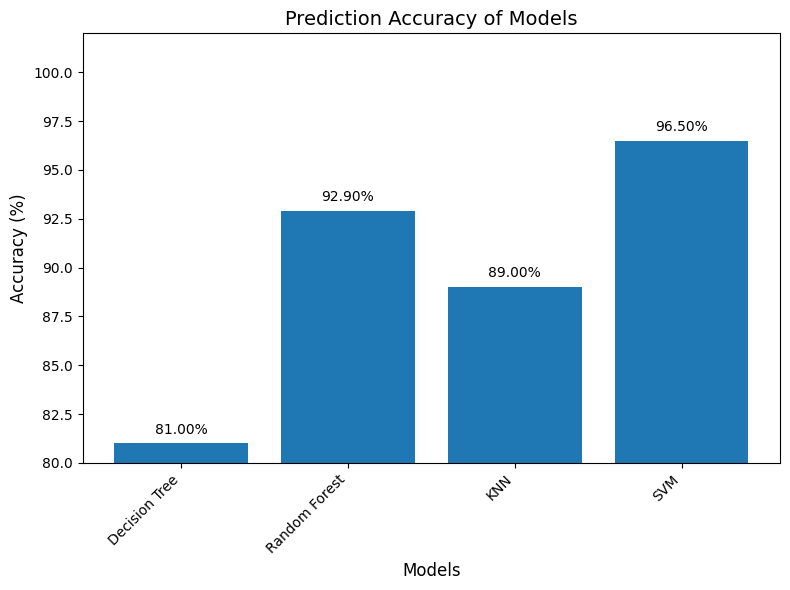

In [ ]:


# Accuracies for each model
dt_accuracy = .81
rf_accuracy = 0.929
knn_accuracy = 0.89
svm_accuracy = 0.965

# Combine accuracies into a list
accuracies = [
    dt_accuracy,
    rf_accuracy,
    knn_accuracy,
    svm_accuracy
]

# Convert accuracies to percentages
accuracies_percent = [acc * 100 for acc in accuracies]

# Model names
model_names = [
    "Decision Tree",
    "Random Forest",
    "KNN",
    "SVM"
]

# Define unique colors for each bar
# colors = [
#     '#1f77b4',  # Decision Tree: Blue
#     '#ff7f0e',  # Naive Bayes (No Scaling): Orange
#     '#2ca02c',  # Naive Bayes (MinMax Scaling): Green
#     '#d62728',  # Random Forest: Red
#     '#9467bd',  # SVM (No Scaling): Purple
#     '#8c564b',  # SVM (MinMax Scaling): Brown
#     '#e377c2',  # SVM (Standard Scaling): Pink
#     '#7f7f7f',  # KNN (No Scaling): Gray
#     '#bcbd22'   # KNN (MinMax Scaling): Olive
# ]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies_percent)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.title('Prediction Accuracy of Models', fontsize=14)
plt.ylim(80, 102)  # Set y-axis range for better visualization

# Annotate the accuracy values on the bars
for i, acc in enumerate(accuracies_percent):
    plt.text(i, acc + 0.5, f"{acc:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()
